<a href="https://colab.research.google.com/github/paryoja/deeplearningstudy/blob/master/classification/Classification_(1)_KNN_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터를 만드는 코드는 그대로 사용합니다.

(-3, 12)

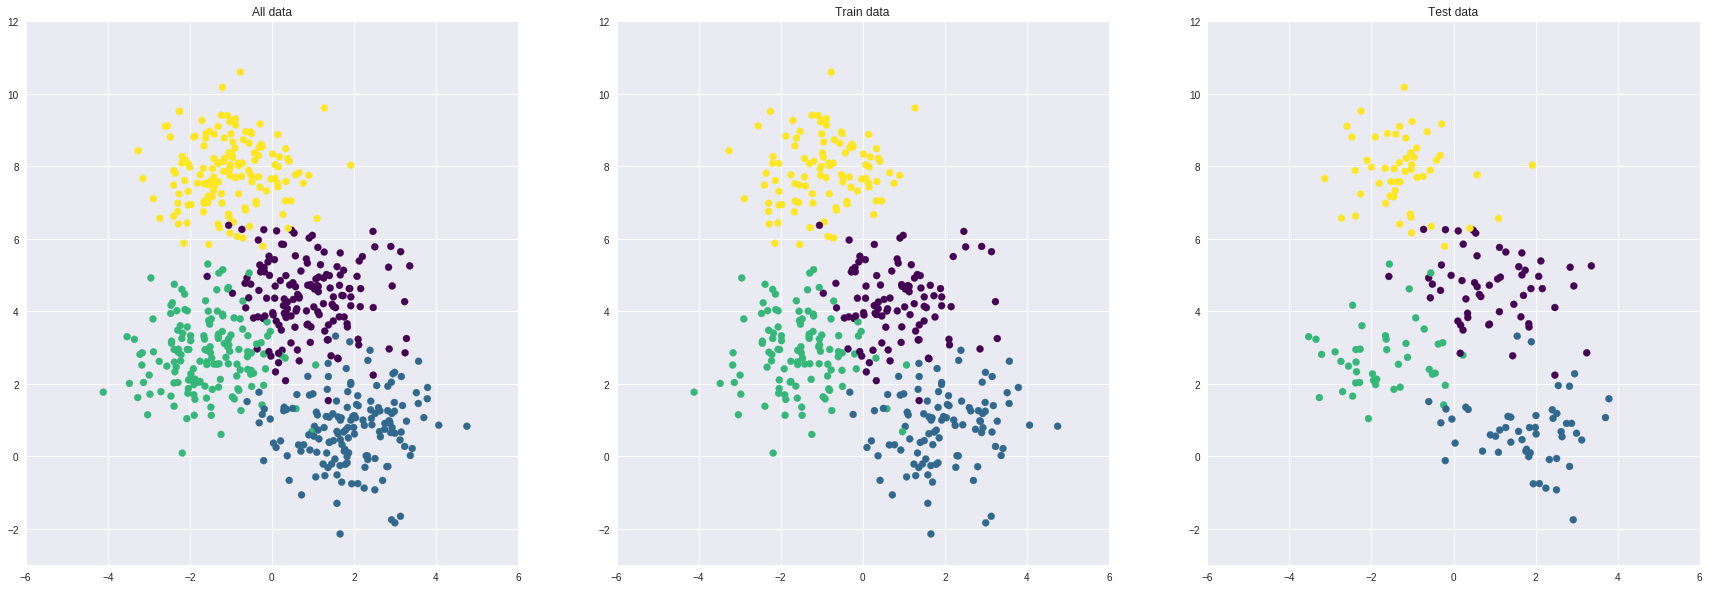

In [6]:
from sklearn.datasets import make_blobs

dx, dy = make_blobs(600, centers=4, cluster_std=1.0, random_state=0)

import matplotlib.pyplot as plt
%matplotlib inline 

fig = plt.figure(figsize=(30, 10))
plt.subplot(131)


plt.title('All data')
plt.scatter(dx[:, 0], dx[:, 1], c=dy, cmap='viridis')
plt.xlim(-6, 6)
plt.ylim(-3, 12)

train_dx = dx[:400]
train_dy = dy[:400]

test_dx = dx[400:]
test_dy = dy[400:]


plt.subplot(132)
plt.title('Train data')
plt.scatter(train_dx[:, 0], train_dx[:, 1], c=train_dy, cmap='viridis')
plt.xlim(-6, 6)
plt.ylim(-3, 12)

plt.subplot(133)

plt.title('Test data')
plt.scatter(test_dx[:, 0], test_dx[:, 1], c=test_dy, cmap='viridis')
plt.xlim(-6, 6)
plt.ylim(-3, 12)


매 포인트 마다 거리를 계산하고

1. 가장 가까운 k개 점을 선택한다
2. 각각의 점의 class label을 가져온다
3. 가장 많은 class label의 값을 찾는다


In [0]:
import numpy as np

class NearestClassifier:
  
  def __init__(self, n_classes): # 데이터에 존재하는 class 개수를 받도록 확장하겠습니다.
    self.n_classes = n_classes
  
  def train(self, x, y):
    self.x = x
    self.y = y
    
  def predict(self, points, k):
    # 입력으로 k를 추가로 받습니다.
    prediction = []
      
    for point in points:
      # broadcasting 이 일어납니다!!!!
      l1_distance = np.sum(np.abs(self.x - point), axis=1)

      # 거리 계산까지는 같습니다.
      # 1 가장 가까운 k개 점을 선택한다 ->  더 좋은 solution은 minheap을 사용하는 것입니다.
      idxs = np.argsort(l1_distance)[:k]
      
      # 2 class label으로 바꾼다
      
      # classes = self.y[idxs] 도 가능합니다.
      classes = []
      for i in idxs:
        classes.append(self.y[i])
        
      # 3 가장 많은 class를 세봅시다
      count = [0] * self.n_classes
      
      for c in classes:
        count[c] += 1
        
      pred = np.argmax(count) # 가장 많이 나왔던 class의 id를 추가
      prediction.append(pred)
      
    return prediction

참고로 Numpy에서는 index를 리스트로 줄 수 도 있습니다.

In [8]:
import numpy as np

data = np.array([1, 2, 3, 4, 5, 6, 7])

idx= [1, 4, 2]

print(data[idx])

[2 5 3]


테스트 해봅시다

Accuracy 0.93


(-5, 10)

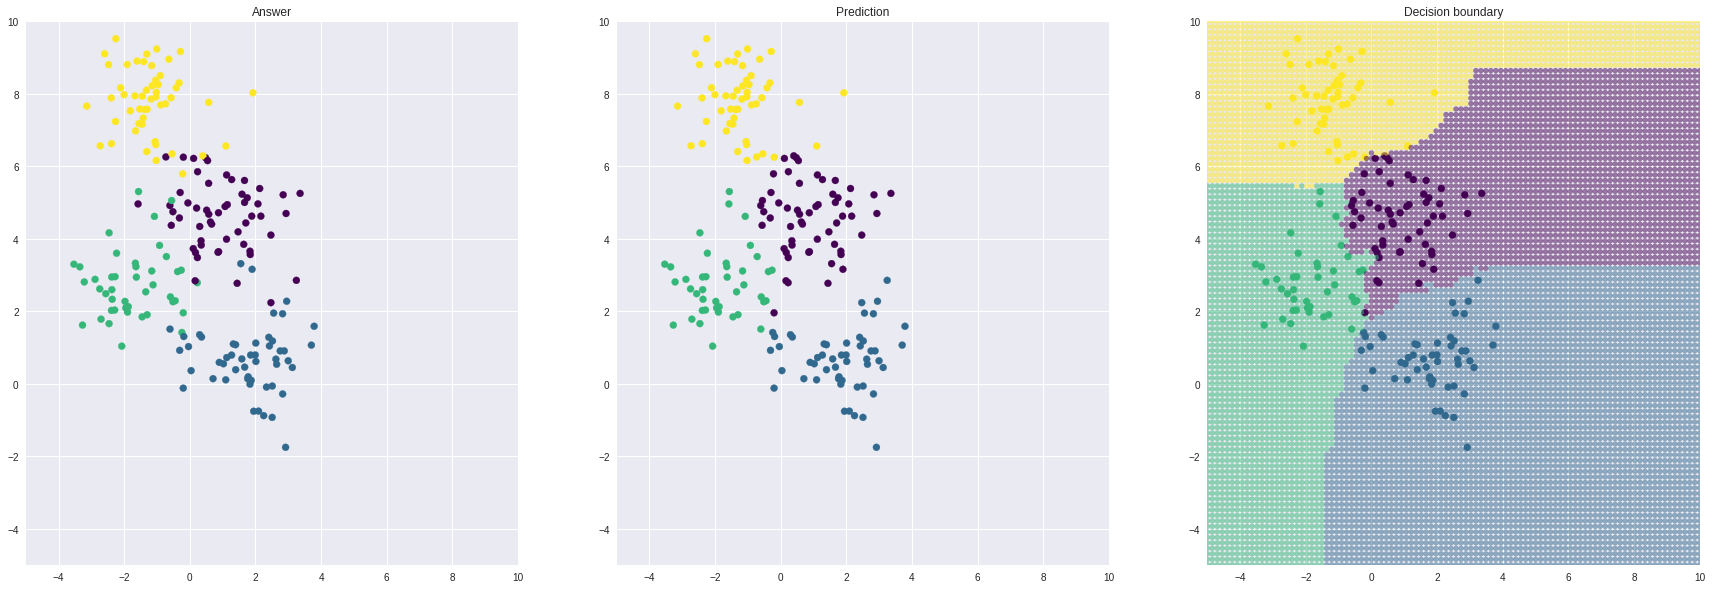

In [14]:
classifier = NearestClassifier(n_classes=4)

classifier.train(train_dx, train_dy)

predict = classifier.predict(test_dx, k=5)

plt.figure(figsize=(30, 10))

plt.subplot(131)
plt.title('Answer')
plt.scatter(test_dx[:, 0], test_dx[:, 1], c=test_dy, cmap='viridis')
plt.xlim(-5, 10)
plt.ylim(-5, 10)


plt.subplot(132)
plt.title('Prediction')
plt.scatter(test_dx[:, 0], test_dx[:, 1], c=predict, cmap='viridis')
plt.xlim(-5, 10)
plt.ylim(-5, 10)


count = len(test_dy)

accuracy = 0
for ans, p in zip(test_dy, predict):
  if ans == p:
    accuracy += 1
accuracy = accuracy / count

print("Accuracy", accuracy)

plt.subplot(133)

# 점을 무지 많이 찍으면 배경으로 색칠한 효과가 납니다.

background_x = np.linspace(-5, 10, 100)
background_y = np.linspace(-5, 10, 100)

background = []

for x in background_x:
  for y in background_y:
    background.append([x, y])
    
background = np.array(background)

back_predict = classifier.predict(background, k=5)

plt.title('Decision boundary')
plt.scatter(test_dx[:, 0], test_dx[:, 1], c=predict, cmap='viridis')
plt.scatter(background[:, 0], background[:, 1], c=back_predict, alpha=0.50, s=25, cmap='viridis')
plt.xlim(-5, 10)
plt.ylim(-5, 10)

Hyperparameter를 세팅해봅시다.

여기에서는 validation set으로 해야하지만, 학습시에 만들어 놓은것이 없으므로

그냥 test셋으로 해보겠습니다.

7


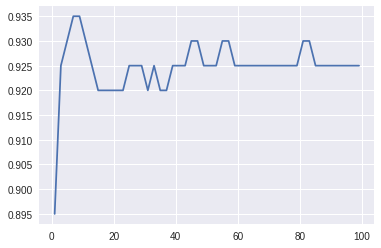

In [18]:
test_k = range(1, 100, 2)

count = len(test_dy)
acc = []
for k in test_k:
  predict = classifier.predict(test_dx, k=k)
  accuracy = 0
  for ans, p in zip(test_dy, predict):
    if ans == p:
      accuracy += 1
  accuracy = accuracy / count
  acc.append(accuracy)
  
plt.plot(test_k, acc)

print(test_k[np.argmax(acc)])

주어진 테스트 데이터에 대해서는 k=7일때 가장 성능이 높습니다.